### Deep Q-Learning

In [3]:
from collections import deque
import random
import gym
import numpy as np
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


class Agent(object):
    
    def __init__(self, environment):
        #parameter, hyperparameter
        self.state_size = 500
        self.action_size = 6
        self.discount_rate = 0.99 #gelecekteki ödüle odaklan ya da elindekiyle yetin
        self.learning_rate = 0.09
        self.epsilon = 1 #explore rate - at the beginning explore is maximum
        self.epsilon_decay = 0.9 #0.995
        self.epsilon_min = 0.001#0.1
        
        self.memory = deque(maxlen = 50) #FIFO data structure
        
        self.model = self.build_model()
        
    
        
            
    def build_model(self):
        # neural network for deep q learning
        model = Sequential()
        model.add(Dense(10, input_dim = self.state_size, activation = "relu"))
        model.add(Dense(10, activation="relu"))
        model.add(Dense(48, activation="relu"))
        model.add(Dense(48, activation="relu"))
        model.add(Dense(48, activation="relu"))
        model.add(Dense(48, activation="relu"))
        model.add(Dense(self.action_size,activation = "linear"))
        model.compile(loss = "mse", optimizer = Adam(lr = self.learning_rate))
        return model


            
    def remember(self, state, action, reward, next_state, done):
        #stroge
        memory = (state, action, reward, next_state, done)
        #print("memory : \n", memory,"\n")
        self.memory.append(memory)
        
        
       
    def act(self,state):
        #explore - select action randomly
        if random.uniform(0,1) <= self.epsilon:
            return environment.action_space.sample()
        #exploit
        else:
            actions = self.model.predict(state)
            best_action = np.argmax(actions)
            return best_action
        

              
    
    def replay(self, batch_size):
        #training
        if len(self.memory) < batch_size:
            return
        #select samples randomly 
        minibatch = random.sample(self.memory,batch_size)
        
        
        
        for state, action, reward, next_state, done in minibatch:
            
            if done:
                target = reward
            else:
                
                target = reward + self.discount_rate*np.amax(self.model.predict(next_state)[0]) 
                
            #print("Last action",action)  
            #print("Target:",target)
            train_target = self.model.predict(state)
            #print("When state is input for NN:", train_target)
            train_target[0][action] = target
            #print("updated train target",train_target)
            self.model.fit(state,train_target, verbose = 0)
            #print("***************")
            
            
    
    
    def adaptiveEpsilonGreedy(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon = self.epsilon*self.epsilon_decay
            
            

    

    def oneHotEncoding(self,state):
        coded_state = np.zeros((1,500))
        coded_next_state = np.zeros((1,500))

        for i in range(coded_state.shape[1]):
            if i == state[0][0]:
                coded_state[0][int(state[0][0])] = 1
                
        return coded_state
        
        
      
    
if __name__ == "__main__":
    
    #define environment and agent
    environment = gym.make("Taxi-v3")
    
    num_state = environment.observation_space
    num_action = environment.action_space
    print(num_state)
    
    
    agent = Agent(environment)
    
      
    #define episode count
    episodes = 30
    
    #batch_size
    batch_size = 16
    reward_list = []
    dropout_list = []
    
    for i in range(episodes):
        
        #initialize the environment and initial state for every episode
        state = environment.reset()
        state = np.array(state).reshape((1,1))
        
        state = agent.oneHotEncoding(state)
        
        

        reward_count = 0
        dropouts = 0
        
       
        while(True):       
            #act - select action
            action = agent.act(state)
            
            #print("Action:", action)
            
            #apply action and take observations
            next_state, reward, done, _ = environment.step(action)
            next_state = np.array(next_state).reshape((1,1))
            
            
            
            next_state = agent.oneHotEncoding(next_state)
            
                        
            #remember / storage
            agent.remember(state, action, reward, next_state, done)
    
            #Demonstrate
            #environment.render()
            
            #update state
            state = next_state
            #print(state)
            
            #find wrong dropouts
            if reward == -10: #reward = -10 ise yanlış yerde indirmiş demektir
                dropouts += 1 #yanlış indirme sayısı arttı
        
            reward_count += reward
            
            
            #replay - training
            agent.replay(batch_size)
            
            #adjust epsilon
            agent.adaptiveEpsilonGreedy()
            
            #print("Reward:", reward)
            #check done
            if done:
                
                break
        #print("*********************************************")     
        reward_list.append(reward_count) #her episode sonundaki toplam reward kaydedildi
        dropout_list.append(dropouts) #her episode sonundaki yanlış indirme sayısı kaydedildi
        print("Episode: {}, total_reward: {}, wrong_droput: {}".format(i,reward_count, dropouts))
        #print("*********************************************")  


Discrete(500)
Episode: 0, total_reward: -407, wrong_droput: 23
Episode: 1, total_reward: -290, wrong_droput: 10
Episode: 2, total_reward: -236, wrong_droput: 4
Episode: 3, total_reward: -200, wrong_droput: 0
Episode: 4, total_reward: -353, wrong_droput: 17
Episode: 5, total_reward: -254, wrong_droput: 6
Episode: 6, total_reward: -227, wrong_droput: 3
Episode: 7, total_reward: -263, wrong_droput: 7
Episode: 8, total_reward: -227, wrong_droput: 3
Episode: 9, total_reward: -218, wrong_droput: 2
Episode: 10, total_reward: -218, wrong_droput: 2
Episode: 11, total_reward: -209, wrong_droput: 1
Episode: 12, total_reward: -200, wrong_droput: 0
Episode: 13, total_reward: -218, wrong_droput: 2
Episode: 14, total_reward: -200, wrong_droput: 0
Episode: 15, total_reward: -200, wrong_droput: 0
Episode: 16, total_reward: -200, wrong_droput: 0
Episode: 17, total_reward: -200, wrong_droput: 0
Episode: 18, total_reward: -200, wrong_droput: 0
Episode: 19, total_reward: -200, wrong_droput: 0
Episode: 20, 

#### Hocam discrete state space e sahip environment üzerinde DQL ile fine tuning yapamadım. Environment state olarak one-dimensional vector döndürüyordu. One-hot encoding yapmayı denedim gene de olmadı. Normalde maximum reward olarak QL 0 rewarda converge edibiliyordu. Ancak DQL -200 civarına converge ediyor.

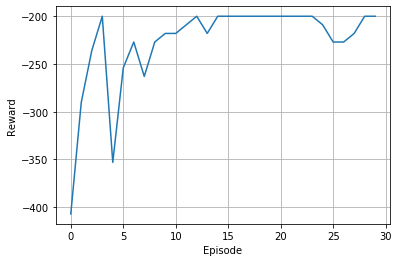

In [4]:
plt.plot(reward_list)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)